### Імпорт бібліотек

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error
import warnings
warnings.filterwarnings("ignore")

### Датасет

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [20]:
df.head(25)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


### Візуалізація даних

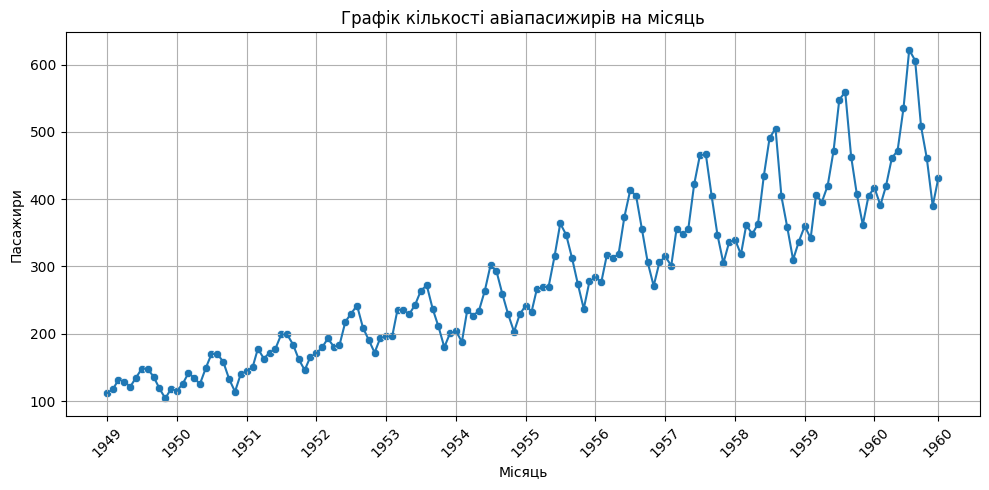

In [81]:
df['Month'] = pd.to_datetime(df['Month'])

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Month', y='#Passengers')
plt.plot(df['Month'], df['#Passengers'])

xticks = list(df['Month'][::12])
if df['Month'].iloc[-1] not in xticks:
    xticks.append(df['Month'].iloc[-1])

plt.xticks(xticks, [d.strftime('%Y') for d in xticks], rotation=45)

plt.title('Графік кількості авіапасижирів на місяць')
plt.xlabel('Місяць')
plt.ylabel('Пасажири')
plt.tight_layout()
plt.grid(True)

### Поділ на тренувальні та тестувальні дані

In [27]:
train_data = df['#Passengers'][:-12]

In [28]:
test_data = df['#Passengers'][-12:]

### Алгоритм Експоненційного зглажування

In [32]:
model_exp = SimpleExpSmoothing(train_data)
fit_exp = model_exp.fit(smoothing_level=0.7, optimized=False)
forecast_exp = fit_exp.forecast(12)

### Алгоритм ARMA

In [71]:
model_arma = ARIMA(train_data, order=(2, 0, 2))
fit_arma = model_arma.fit()
forecast_arma = fit_arma.forecast(steps=12)

### Алгоритм ARIMA

In [42]:
model_arima = ARIMA(train_data, order=(2, 1, 2))
fit_arima = model_arima.fit()
forecast_arima = fit_arima.forecast(steps=12)

### Алгоритм Ковзного середнього

In [67]:
rolling_mean = train_data.rolling(window=3).mean()

last_values = train_data[-3:].values.tolist()

forecast_ma = []

for _ in range(12):
    next_value = np.mean(last_values[-3:])  
    forecast_ma.append(next_value)
    last_values.append(next_value)  

### Візуалізація прогнозу даних

In [78]:
months = pd.date_range(start='1960-01-01', end='1960-12-01', freq='MS')

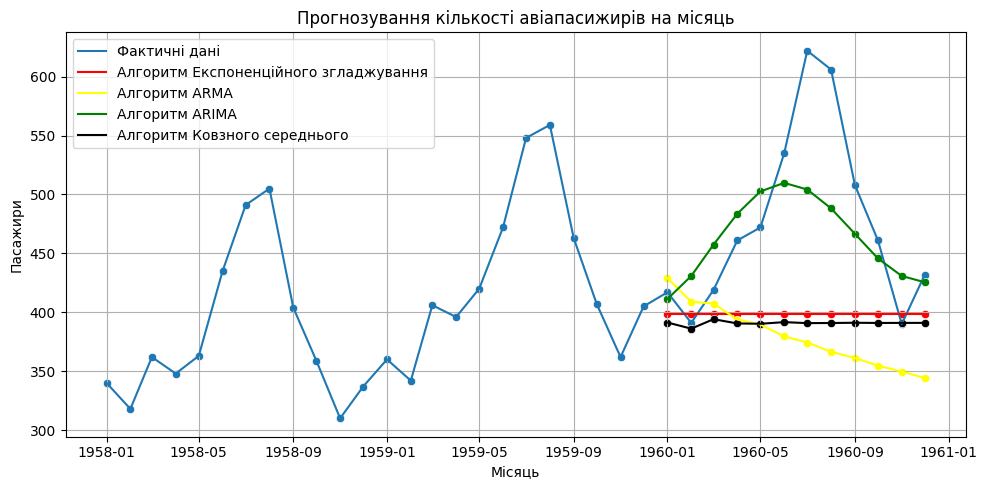

In [82]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=df['Month'][-36:], y=df['#Passengers'][-36:])
plt.plot(df['Month'][-36:], df['#Passengers'][-36:], label='Фактичні дані')

sns.scatterplot(x=months, y=forecast_exp, color='red')
plt.plot(months, forecast_exp, color='red', label='Алгоритм Експоненційного згладжування')

sns.scatterplot(x=months, y=forecast_arma, color='yellow')
plt.plot(months, forecast_arma, color='yellow', label='Алгоритм ARMA')

sns.scatterplot(x=months, y=forecast_arima, color='green')
plt.plot(months, forecast_arima, color='green', label='Алгоритм ARIMA')

sns.scatterplot(x=months, y=forecast_ma, color='black')
plt.plot(months, forecast_ma, color='black', label='Алгоритм Ковзного середнього')

plt.title('Прогнозування кількості авіапасижирів на місяць')
plt.xlabel('Місяць')
plt.ylabel('Пасажири')
plt.tight_layout()
plt.legend()
plt.grid(True)

### Середнє відхилення

In [91]:
print(f"Алгоритм Експоненційного згладжування: {root_mean_squared_error(test_data, forecast_exp):.0f}")
print(f"Алгоритм ARMA: {root_mean_squared_error(test_data, forecast_arma):.0f}")
print(f"Алгоритм ARIMA: {root_mean_squared_error(test_data, forecast_arima):.0f}")
print(f"Алгоритм Ковзного середнього: {root_mean_squared_error(test_data, forecast_ma):.0f}")

Алгоритм Експоненційного згладжування: 108
Алгоритм ARMA: 128
Алгоритм ARIMA: 55
Алгоритм Ковзного середнього: 113
